In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amundsen_Extent = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Bell_Amundsen_Extent)
fp.date_time(Bell_Amundsen_Extent)

,Extent,Date
0,1179855.894,1979-01-01
1,879585.254,1979-02-01
2,791619.096,1979-03-01
3,1254912.071,1979-04-01
4,1620142.247,1979-05-01
...,...,...
533,1556568.455,2023-06-01
534,1917507.979,2023-07-01
535,2601630.327,2023-08-01
536,2534223.780,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bell_Amundsen_Extent['Extent'] = scaler.fit_transform(Bell_Amundsen_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 10
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bell_Amundsen_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((517, 12, 1), (517,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bell_Amund_model_LT10/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.3844 - root_mean_squared_error: 0.6200

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 8s 98ms/step - loss: 0.3795 - root_mean_squared_error: 0.6160 - val_loss: 0.2586 - val_root_mean_squared_error: 0.5085
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.2317 - root_mean_squared_error: 0.4813

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.2317 - root_mean_squared_error: 0.4813 - val_loss: 0.2050 - val_root_mean_squared_error: 0.4528
Epoch 3/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1713 - root_mean_squared_error: 0.4139

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1671 - root_mean_squared_error: 0.4088 - val_loss: 0.1655 - val_root_mean_squared_error: 0.4068
Epoch 4/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1298 - root_mean_squared_error: 0.3603

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.1293 - root_mean_squared_error: 0.3596 - val_loss: 0.1359 - val_root_mean_squared_error: 0.3686
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.1020 - root_mean_squared_error: 0.3193

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1020 - root_mean_squared_error: 0.3193 - val_loss: 0.1112 - val_root_mean_squared_error: 0.3335
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0854 - root_mean_squared_error: 0.2922

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0817 - root_mean_squared_error: 0.2859 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3052
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0659 - root_mean_squared_error: 0.2567

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0650 - root_mean_squared_error: 0.2549 - val_loss: 0.0764 - val_root_mean_squared_error: 0.2764
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0520 - root_mean_squared_error: 0.2281

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0499 - root_mean_squared_error: 0.2234 - val_loss: 0.0589 - val_root_mean_squared_error: 0.2426
Epoch 9/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0374 - root_mean_squared_error: 0.1934

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0385 - root_mean_squared_error: 0.1961 - val_loss: 0.0472 - val_root_mean_squared_error: 0.2173
Epoch 10/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0305 - root_mean_squared_error: 0.1747

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0295 - root_mean_squared_error: 0.1718 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1844
Epoch 11/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0274 - root_mean_squared_error: 0.1656

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0260 - root_mean_squared_error: 0.1611 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1500
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.0204 - root_mean_squared_error: 0.1430

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0204 - root_mean_squared_error: 0.1430 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1396
Epoch 13/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1329

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0175 - root_mean_squared_error: 0.1322 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1199
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1239

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0154 - root_mean_squared_error: 0.1239 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1174
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0140 - root_mean_squared_error: 0.1182

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0146 - root_mean_squared_error: 0.1210 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 16/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.1157

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0992
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1018
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1035
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0148 - root_mean_squared_error: 0.1218 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1067
Epoch 21/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1150

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0133 - root_mean_squared_error: 0.1154 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0991
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1048
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0992
Epoch 25/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1028
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0129 - root_mean_squared_error: 0.1138 - val_loss: 0.0100 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0983
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0993
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1042
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0142 - root_mean_squared_error: 0.1192 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1044
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0157 - root_mean_squared_error: 0.1252 - val_loss: 0.0104 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT10\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.6834001104036966 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

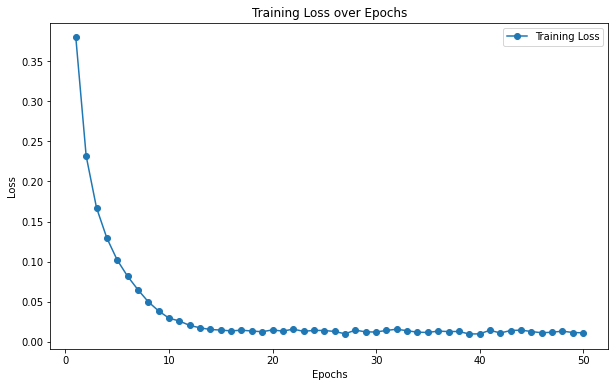

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

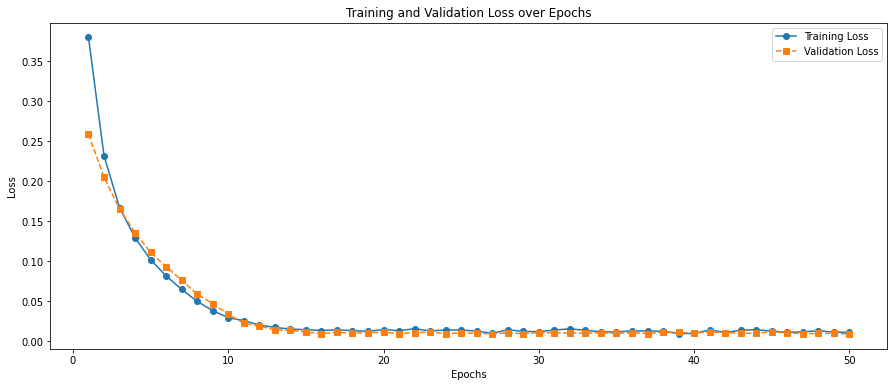

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bell_Amund_model_LT10/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 15ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09280658220601017
MAE : 0.07322587102877444


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.743472e+05,451914.219
1,3.674156e+05,439855.813
2,7.155457e+05,807857.307
3,1.117387e+06,1184280.145
4,1.502577e+06,1468308.405
5,1.770690e+06,1540851.607
6,2.019978e+06,1989099.836
7,2.083754e+06,2096990.761
8,2.023974e+06,2080961.032
9,1.736582e+06,1695704.661


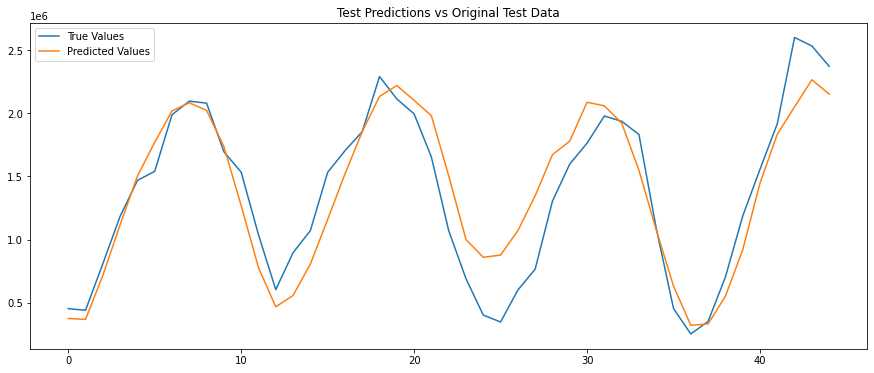

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

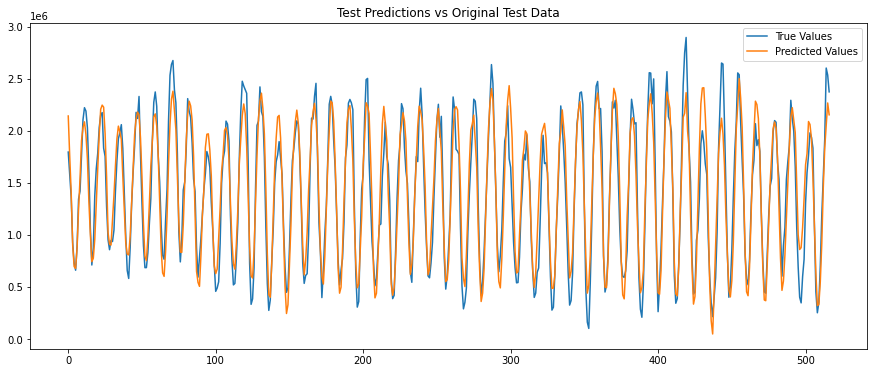

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()